<a href="https://colab.research.google.com/github/Groupac/Collab/blob/master/3%D0%9F%D0%9C%20%D0%91%D1%80%D0%B0%D1%82%D1%87%D0%B8%D0%BA%D0%BE%D0%B2%20%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Построение графика абсолютно непрерывного равномерного распределения на примере задачки**
 Условие: Непрерывная случайная величина X задана своей плотностью распределения
$$
F(x)=\left\{%
\begin{array}{ll}
    C, & \hbox{$x \in (-1;3)$;} \\
    0, & \hbox{$x \notin (-1;3)$;} \\\end{array}%
\right.
$$

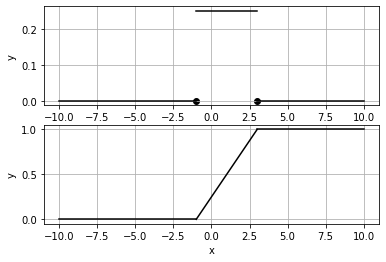

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a = -1
b = 3
C= 1/(b-a)

#задаём значение X 
x1 = np.linspace(-1,3,4)
x2 = np.linspace(-10,-1)
x3 = np.linspace(3,10)

#задаём значения Y на всех участках
y1 = [C for i in x1]
y2 = [0 for i in x2]
y3 = [0 for i in x3]

#построение графика плотности распределения
plt.subplot(211)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()  
plt.plot(x1,y1, color="Black")
plt.plot(x2,y2, color="Black")
plt.plot(x3,y3, color="Black")

#указываем точки на конце, где значение включено
plt.scatter(-1,0, color="Black", s=35, marker = "o")  
plt.scatter(3,0, color="Black", s=35, marker = "o")

#значени Y для графика распределения
y = [C*(i+1) for i in x1]
y2 = [0 for i in x2]
y3 = [1 for i in x3]

#построение графика распределения
plt.subplot(212)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()  
plt.plot(x1,y, color="Black")
plt.plot(x2,y2, color="Black")
plt.plot(x3,y3, color="Black")



# **Построение графика биноминального распределения с параметрами (n,p)**



Введите p(0<p<1): 
0.4
Введите n(целое): 
10


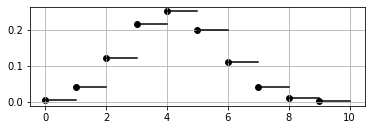

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
k = []
print('Введите p(0<p<1): ')
p = float(input())
print('Введите n(целое): ')
n = int(input())
for i in range(n):
  k.append(i)

#функция нахождения числа сочетаний 
def C(n, k):
    if k == n or k== 0:
        return 1
    if k != 1:
        return C(n-1, k) + C(n-1, k-1)
    else:
        return n

#создаём и заполняем массив значений P(x)
y_mas = []
for i in range(len(k)):
  s = C(n,i)
  y_mas.append(round(s*(p**i)*((1-p)**(n-i)),4))

#Рисование графика
plt.subplot(211)
plt.grid()
for i in k:
  x = np.linspace(0+i,1+i)
  y = [y_mas[i] for j in x]
  plt.plot(x,y,color="Black")

#Окрашивание точек, которые включены
for i in range(len(k)):
  plt.scatter(k[i],y_mas[i],color="Black",s=35, marker="o")




# **Задача 1. Найти параметр  $\lambda$ методом моментов.**
Нам дан объём выборки N = 130.  И таблица $x_i, $n_i

  $$ 
  \begin {array}{|c|c|c|c|c|c|c|} 
      \hline
      x_i & 0 & 1 & 2 & 3 & 4 & 5 \\
      \hline
      n_i & 9 & 39 & 40 & 24 & 11 & 7 \\
      \hline 
  \end {array}
$$

Для начала найдём значение эмпирического мат.ожидания(оценку мат.ожидания): 
        $\overline X$ =$\frac{1}{N}$ $\sum$$x_i$$\cdot$$n_i$
        
  $\overline X$ = $\frac{1}{130}$$\cdot$(0+39+80+72+44+35)= $\frac{270}{130}$  $\approx$ 2,077

Нам известно, что для пуассоновского распределния EX = $\lambda$.

Приравниваем теоретическое мат.ожидание и эмперическое. EX = $\overline X$. 

А т.к мат.ожидание равно $\lambda$, тогда $\lambda$ = $\overline X$ = 2,077


In [ ]:
import numpy as np

N = 130
X_i = np.array([0,1,2,3,4,5])
N_i = np.array([9,39,40,24,11,7])
print((1/N)*(np.sum(X_i*N_i)))


2.076923076923077


# **Задача 2. Составить доверительный интервал уровня доверия (1-0.05) для $\mu$, исходя из известности параметра sigma.**

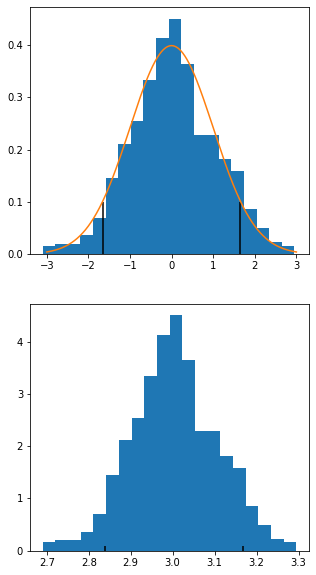

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy.stats import norm


N = 100
M = 1000
mu = 3
sigma = 1
y = 0
a1 = np.array([])
a2 = np.array([])

#заполняем массивы значениями
for _ in range(M):
  #генерируем случайные величины
  x = np.random.normal(mu, sigma, N)
  #добавляем в первый массив случайные величины
  a1 = np.append(a1, (N**0.5)*(np.mean(x)-mu/sigma))
  #добавляем во второй массив значения выборочного среднего
  a2 = np.append(a2, np.mean(x))

fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(a1, bins = 20, density = True)
b1 = np.linspace(-3, 3, 1000)
ax1.plot(b1, norm.pdf(b1))
ax1.vlines(norm.ppf(1-0.05), 0, 0.1)
ax1.vlines(-norm.ppf(1-0.05), 0, 0.1)

ax2.hist(a2, bins = 20, density=True)
ax2.vlines(np.mean(a2)-(sigma*norm.ppf(1-0.05))/(N**0.5), 0, 0.1)
ax2.vlines(np.mean(a2)+(sigma*norm.ppf(1-0.05))/(N**0.5), 0, 0.1)

# **Задача 3. Составить доверительный интервал уровня доверия (1-0.05) для mu, исходя из неизвестности sigma.**

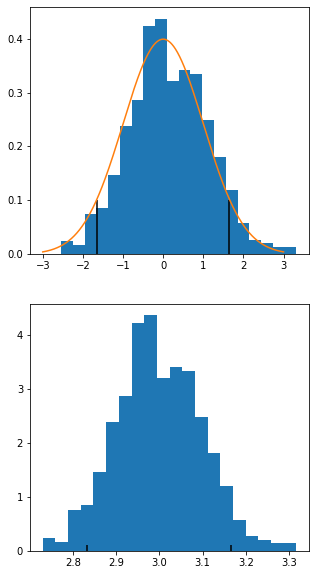

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy.stats import norm


N = 100
M = 1000
mu = 3
sigma = 1
S = (N/(N-1))**0.5
a1 = np.array([])
a2 = np.array([])

#заполняем массивы значениями
for _ in range(M):
  #генерируем случайные величины
  x = np.random.normal(mu, sigma, N)
  #добавляем в первый массив случайные величины
  a1 = np.append(a1, (N**0.5)*(np.mean(x)-mu/S))
  #добавляем во второй массив значения выборочного среднего
  a2 = np.append(a2, np.mean(x))

fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(a1, bins = 20, density = True)
b1 = np.linspace(-3, 3, 1000)
ax1.plot(b1, norm.pdf(b1))
ax1.vlines(norm.ppf(1-0.05), 0, 0.1)
ax1.vlines(-norm.ppf(1-0.05), 0, 0.1)


t = 1.6602
ax2.hist(a2, bins = 20, density=True)
ax2.vlines(np.mean(a2)-(t*S)/(N**0.5), 0, 0.1)
ax2.vlines(np.mean(a2)+(t*S)/(N**0.5), 0, 0.1)